## 5.1

In this section, we plot the normalized flux and try to observe the transit. To convert the x-axis to useful units of time, we first take our mid-transit JD, then subtract that value from the JD array, and finally multiply those values by 24 (24 hours in 1 JD).

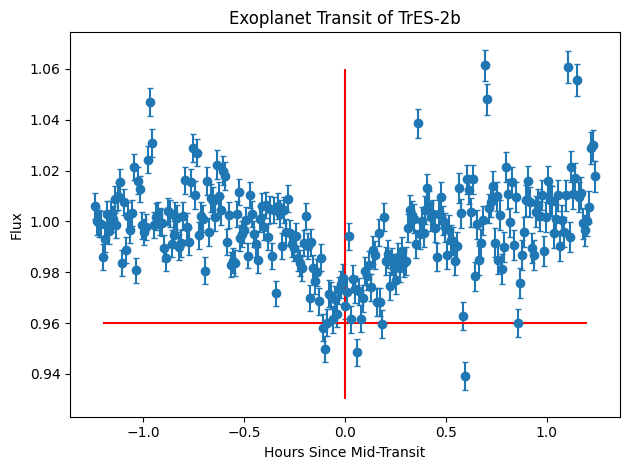

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Load data skipping the header row
data = np.loadtxt('section_4_5.csv', skiprows=1, delimiter=',')

i = 255

date_obs = data[:,0]
flux = data[:,1]
flux_err = data[:,2]
normalized_flux = data[:,3]
r = data[:,4]
r_err = data[:,5]
kep_norm = data[:,6]
kep_err = data[:,7]

transit_time_jd = 2460220.6600800115 # mid-transit JD

# Convert JD to hours since transit
hours_since_transit = (date_obs - transit_time_jd) * 24  # 1 JD = 24 hours

#print(np.where(hours_since_transit == 0))
#print(date_obs[127])

plt.errorbar(hours_since_transit[:i], kep_norm[:i], yerr=kep_err[:i], fmt='o', capsize=2)
plt.vlines(x = hours_since_transit[127], ymin = .93, ymax = 1.06,color='red')
plt.hlines(y = 0.96, xmin = -1.2, xmax = 1.2,color='red')
plt.title('Exoplanet Transit of TrES-2b')
plt.xlabel('Hours Since Mid-Transit')
plt.ylabel('Flux')


plt.tight_layout()
plt.show()


For easier viewing, we color code what we observe as the transit start and transit end:

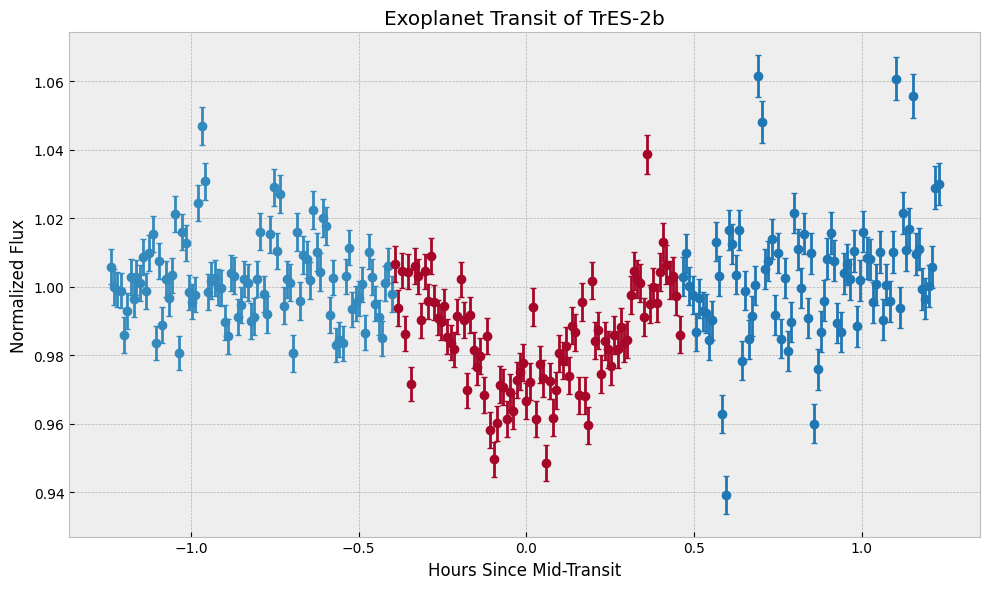

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Load data skipping the header row
data = np.loadtxt('section_4_5.csv', skiprows=1, delimiter=',')

a = 87
b = 175


plt.figure(figsize=(10, 6))

plt.errorbar(hours_since_transit[:a], kep_norm[:a], yerr=kep_err[:a], fmt='o', capsize=2)
plt.errorbar(hours_since_transit[a:b], kep_norm[a:b], yerr=kep_err[a:b], fmt='o', capsize=2)
plt.errorbar(hours_since_transit[b:i], kep_norm[b:i], yerr=kep_err[b:i], fmt='o', capsize=2,color='tab:blue')

#plt.vlines(x = hours_since_transit[129], ymin = .93, ymax = 1.06,color='red')
plt.title('Exoplanet Transit of TrES-2b')
plt.xlabel('Hours Since Mid-Transit')
plt.ylabel('Normalized Flux')

plt.tight_layout()
plt.show()
plt.save_fig('tres2b.png')


## 5.2

To determine the transit depth, we take the average of a few data points around the mid-transit time. To determine the transit duration, we subtract the end-of-transit time from the start-of-transit time.

In [28]:
import numpy as np

# Define the indices around t=0
indices = range(124, 126)

# Extract flux and flux error for the selected indices
flux_selected = kep_norm[indices]
flux_err_selected = kep_err[indices]

# Calculate average flux and its uncertainty
depth_av = np.average(flux_selected)
depth_av_err = np.sqrt(np.sum(flux_err_selected**2)) / len(flux_selected)  

# Calculate transit depth and its uncertainty
depth = 1 - depth_av
depth_err = depth_av_err 

print(f'Transit Depth: {depth:.4f} mag +/- {depth_err:.4f} mag')

#Estimate transit duration
print(f'Transit Duration: {hours_since_transit[b] - hours_since_transit[a]:.2f} hours')


Transit Depth: 0.0259 mag +/- 0.0038 mag
Transit Duration: 0.86 hours


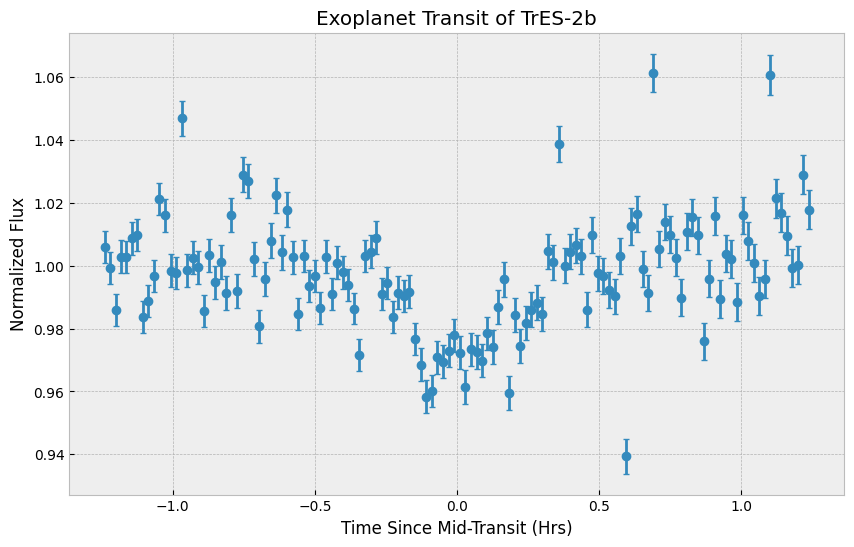

In [3]:
import matplotlib.pyplot as plt
import matplotlib.style as style

new_plot_flux = []
new_plot_err = []
new_plot_time = []

for i in range(0, 255):
    if (i/2 == int(i/2)):
        new_plot_flux.append(kep_norm[i])
        new_plot_err.append(kep_err[i])
        new_plot_time.append(hours_since_transit[i])


style.use('bmh')
plt.figure(figsize=(10, 6))
plt.errorbar(new_plot_time, new_plot_flux, new_plot_err, fmt='o', capsize=2)
plt.title('Exoplanet Transit of TrES-2b')
plt.xlabel('Time Since Mid-Transit (Hrs)')
plt.ylabel('Normalized Flux')
plt.show()
